# Visualization
### Author: Aditya Porwal
## Topics
1. Matplotlib core framework
2. Pandas plot()
3. Seaborn statistical visualization
4. (not covered) Grammar of graphics (ggplot2 see plotnine )
5. (not covered) Interactive plotting

## Resources
1. Ch 9 in Python for Data Analysis, 2nd Ed, Wes McKinney (UCalgary library and https://github.com/wesm/pydata-book)
2. Ch 4 in Python Data Science Handbook, Jake VanderPlas (Ucalgary library and https://github.com/jakevdp/PythonDataScienceHandbook)
3. Fundamentals of Data Visualization, Claus O. Wilke (Ucalgary library and https://serialmentor.com/dataviz/index.html)
4. Overview by Jake VanderPlas https://www.youtube.com/watch?v=FytuB8nFHPQ


## Matplotlib
> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.  
Matplotlib tries to make easy things easy and hard things possible.  
For simple plotting the pyplot module provides a MATLAB-like interface

https://matplotlib.org

Importing matplotlib looks like this

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


### Two interfaces
There are two ways to interact with Matplot lib: a Matlab style and an object oriented style interface.

See Ch 4 in Python Data Science Handbook, Jake VanderPlas

- Two Interfaces for the Price of One, pp. 222
- Matplotlib Gotchas, pp. 232

### Matlab style interface

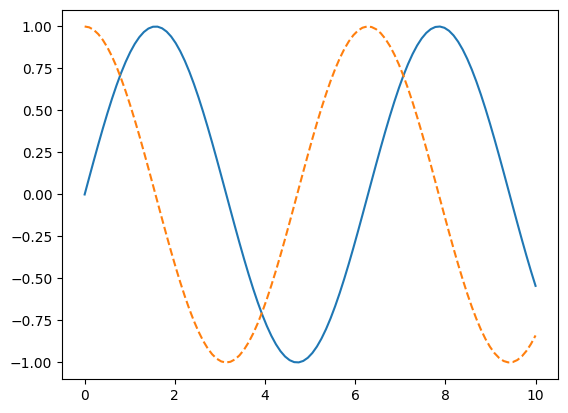

In [3]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

Adding decorations to the plot is done by repeatatly calling functions on the imported `plt` module. All calls within the cell will be applied to the current figure and axes.

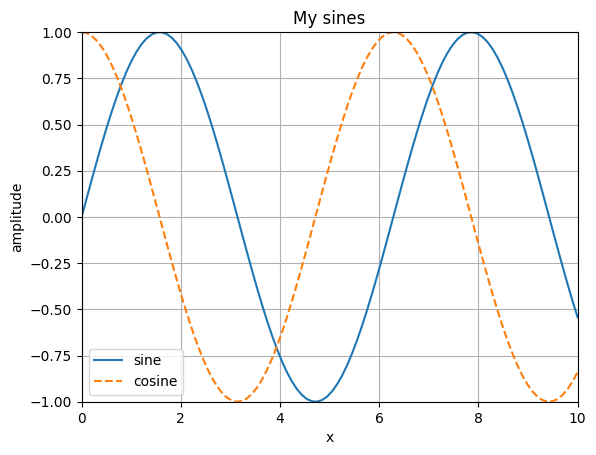

In [4]:
plt.plot(x, np.sin(x), '-', label='sine')
plt.plot(x, np.cos(x), '--', label ='cosine')

plt.xlim([0, 10])
plt.ylim([-1, 1])
plt.xlabel('x')
plt.ylabel('amplitude')
plt.title('My sines')
plt.grid()
plt.legend();

### Object oriented interface 

With this interface, you first create a figure and an axes object, then call their methods to change the plot.

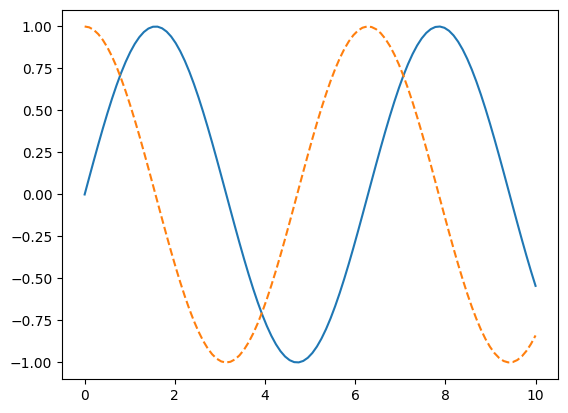

In [5]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-')
ax.plot(x, np.cos(x), '--');

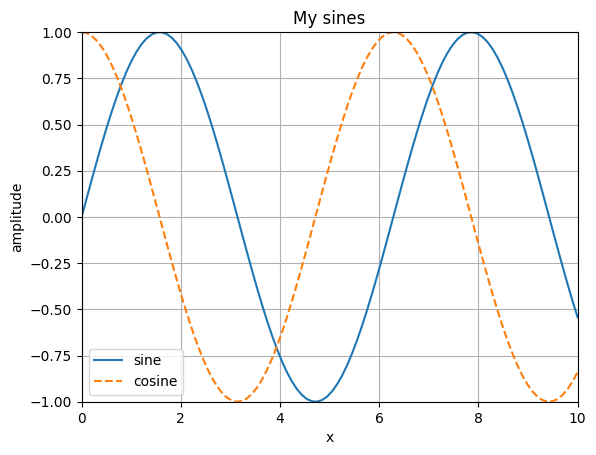

In [6]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-', label='sine')
ax.plot(x, np.cos(x), '--', label ='cosine')

ax.set(xlim=[0, 10], ylim=[-1, 1],
       xlabel='x', ylabel='amplitude',
       title='My sines');
ax.grid()
ax.legend();

### Save to file 
With the figure object at hand, we can save to file

In [7]:
fig.savefig('sines.pdf')
#!ls *.pdf

## Plotting with pandas
> We use the standard convention for referencing the matplotlib API ...
> We provide the basics in pandas to easily create decent looking plots. 

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Loading the auto-mpg dataset.

In [8]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
data = pd.read_csv('C:/Users/imaro/OneDrive/Desktop/ENSF 611/Lab 0/auto-mpg.data', names=column_names, sep=r'\s+', skipinitialspace=True)

Plotting all columns, works, but does not provide a lot of insight.

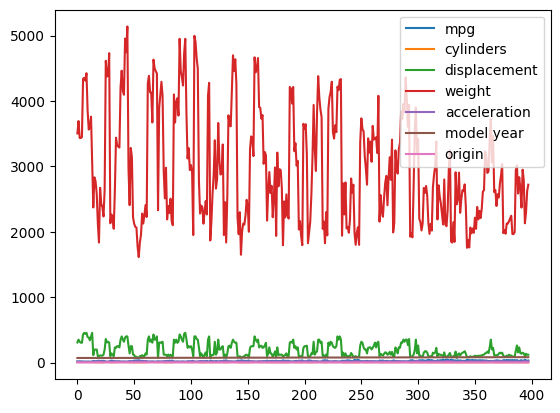

In [9]:
data.plot();

Let's look at the weight distribution (a histogram)

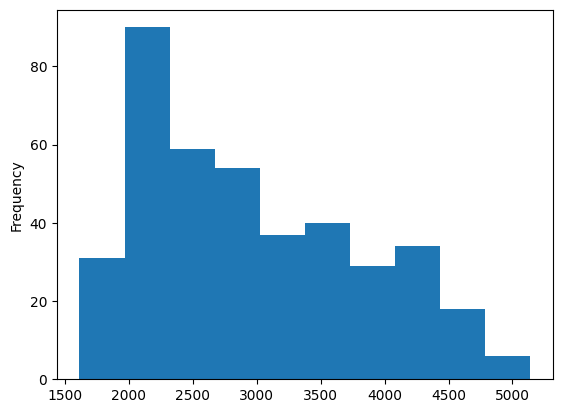

In [10]:
data['weight'].plot.hist();

How many origins do we have?

In [11]:
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

Notice that we accessed the origin column with dot notation. This can be done whenever the column name is 'nice' enough to be a python variable name.

Do we have similar origin for different weights?  
Plotting histograms for each origin side beside directly form the dataframe:

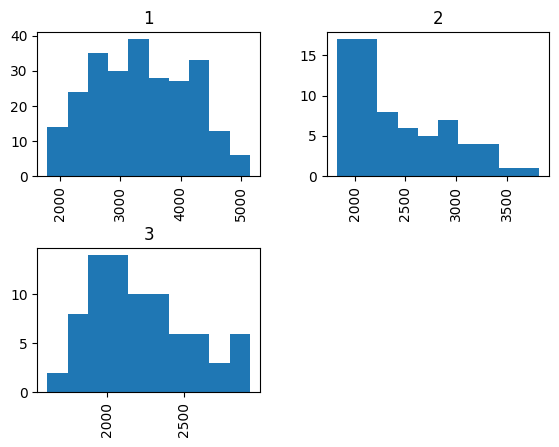

In [12]:
axs = data.hist(column='weight', by='origin')

To format this plot, we can work on the axes (array) that is returned by the plot call. We use Matplotlib object oriented interface methods to do this

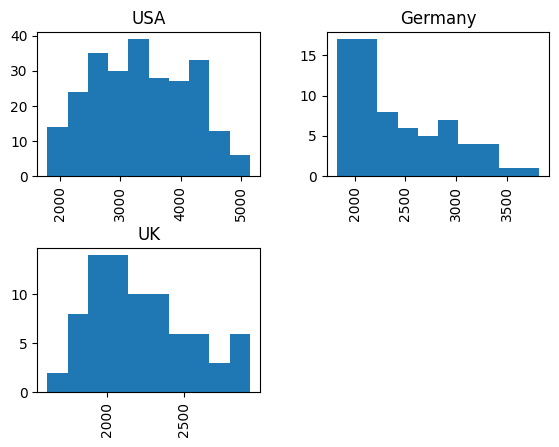

In [16]:
# Using the histogram function from matplotlib instead of Pandas histogram
#hist_weight = data["weight"].groupby(data['origin'])
axs = data.hist(column="weight", by="origin");
axs[0][0].set_title("USA");
axs[0][1].set_title("Germany");
axs[1][0].set_title("UK");

Is weight and cylinders correlated? Maybe it is different for different countries?  
Let's have a look with a scatter plot.

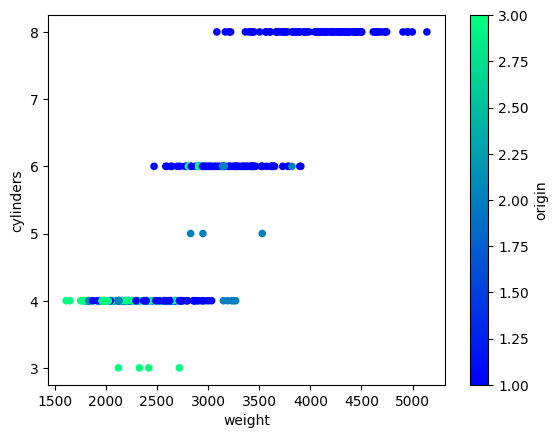

In [ ]:
data.plot.scatter('weight', 'cylinders', c='origin', colormap='winter');

According to:  
https://stackoverflow.com/questions/43578976/pandas-missing-x-tick-labels

the missing x-labels are a pandas bug.

Workaraound is to create axes prior to calling plot

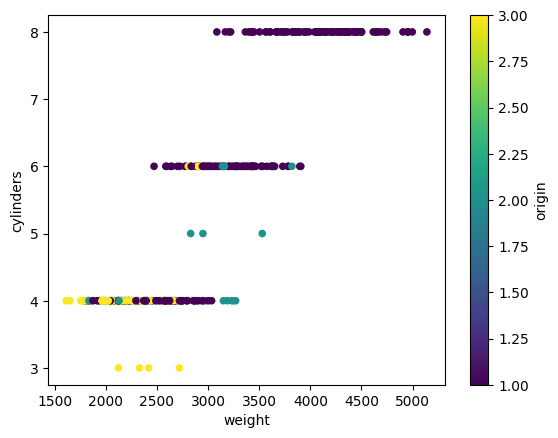

In [ ]:
fig, ax = plt.subplots()
data.plot.scatter('weight', 'cylinders', c='origin', colormap='viridis', ax=ax);

We know origin is categorical.

One way to avoid the colorbar is to loop over the categories and assign colors based on the category.

See:
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

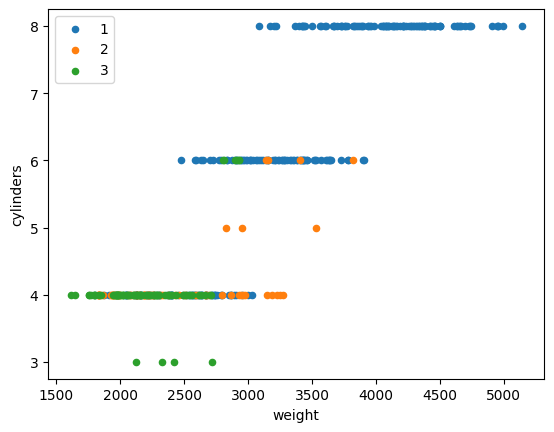

In [ ]:
colors = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:green'}
fig, ax = plt.subplots()
for key, group in data.groupby(by='origin'):
    group.plot.scatter('weight', 'cylinders', c=colors[key], label=key, ax=ax);

## Seaborn 
>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

http://seaborn.pydata.org/index.html

Seaborn is usually imported as `sns`

In [ ]:
import seaborn as sns

Let's re-create the histograms by gender with seaborn with the figure level `displot()` function.

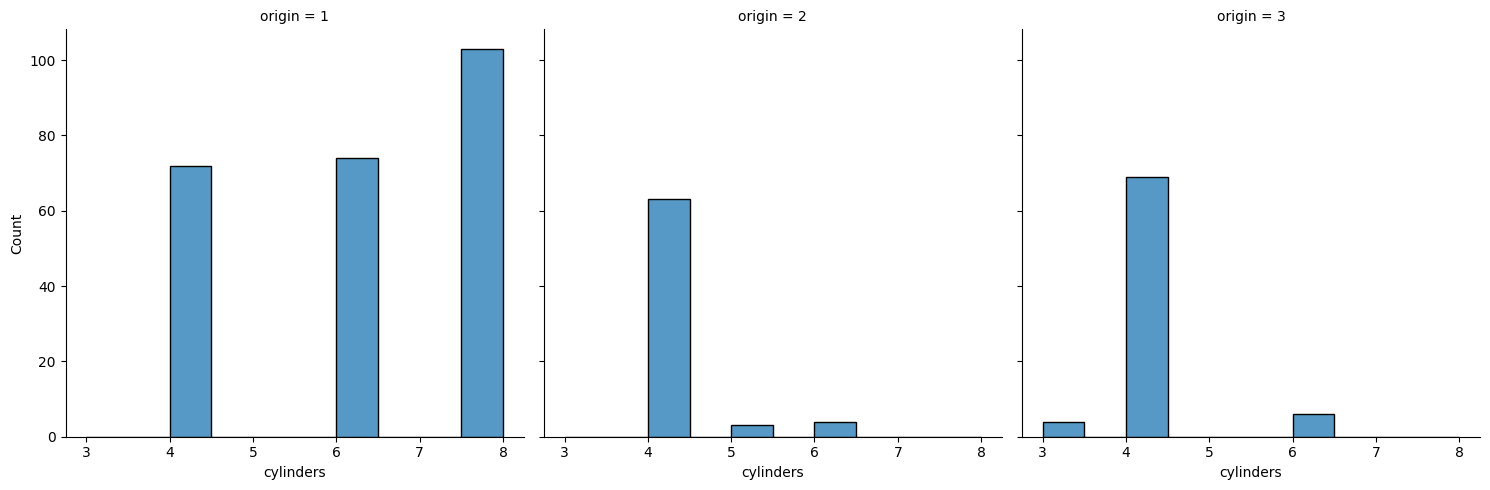

In [ ]:
# Use gender to split age into columns
sns.displot(x='cylinders', col='origin', data=data);

We can display the counts in the same plot, one on top of the other.

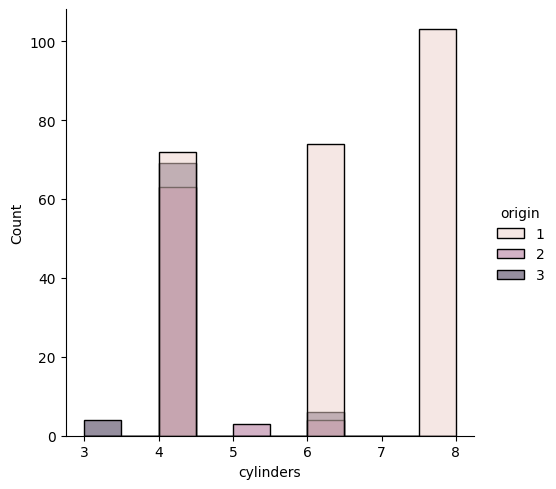

In [ ]:
# Use origin to color (hue) in the same plot
sns.displot(x='cylinders', hue='origin', data=data);

To have an idea of the split between the origins, we can stack the counts, adding up to total.

c:\Users\imaro\miniconda3\envs\ensf-ml\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


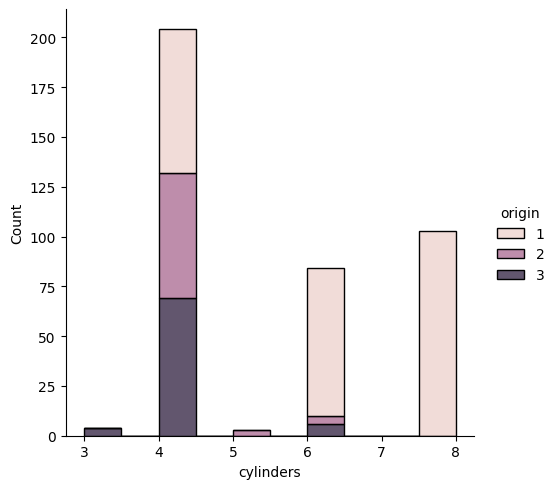

In [ ]:
sns.displot(x='cylinders', hue='origin', data=data, multiple='stack');

We can look at the differences in weight with a boxplot too

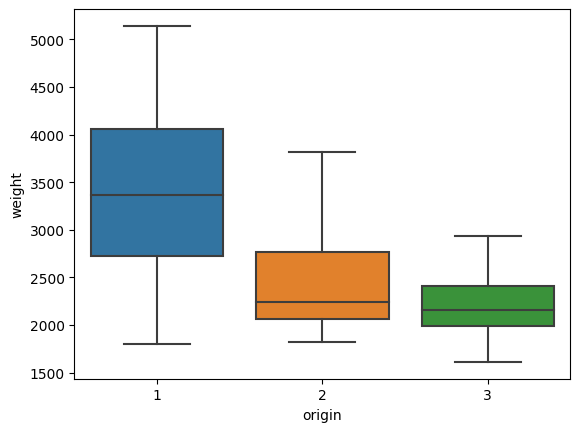

In [ ]:
sns.boxplot(x='origin', y='weight', data=data);

Let's re-create the scatter plot to see if cylinders and weight are correlated by origin.

To make the legend show strings we will create a origin string column with USA, Germany, and UK strings rather than 1, 2, and 3.

In [ ]:
data['origin_str'] = data['origin'].replace([1, 2, 3], ['USA', 'Germany', 'UK'])

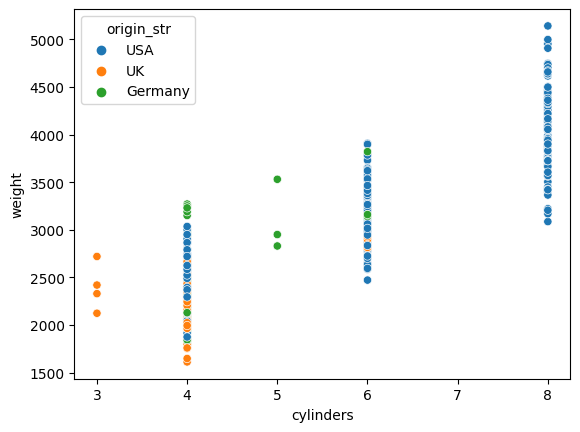

In [ ]:
ax = sns.scatterplot(x='cylinders', y='weight', data=data, hue='origin_str')

Adding a regression line helps with visualizing the relationship

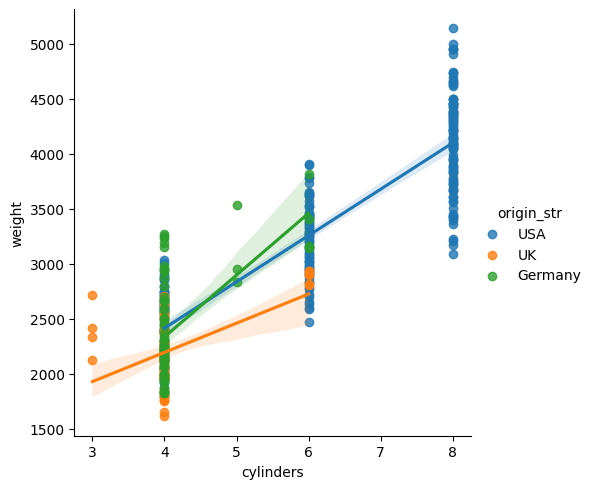

In [ ]:
ax = sns.lmplot(x='cylinders', y='weight', data=data, hue='origin_str')

Maybe there are other correlations in the data set. Pairplot is a great way to get an overview

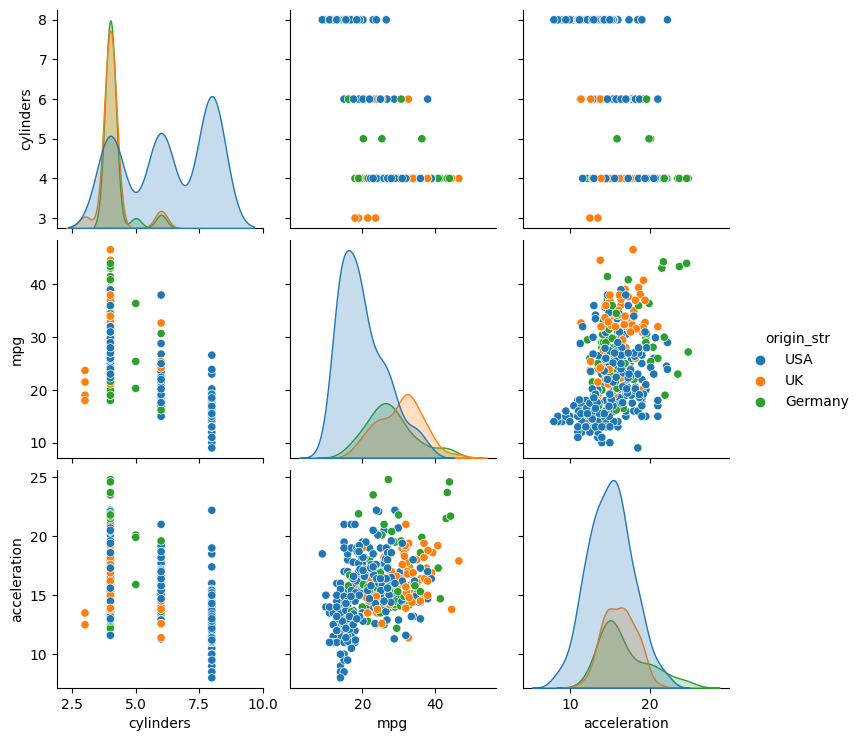

In [ ]:
sns.pairplot(data, vars=['cylinders', 'mpg', 'acceleration'], hue='origin_str');

As an alternative, we can visualize the correlation matrix as a heatmap

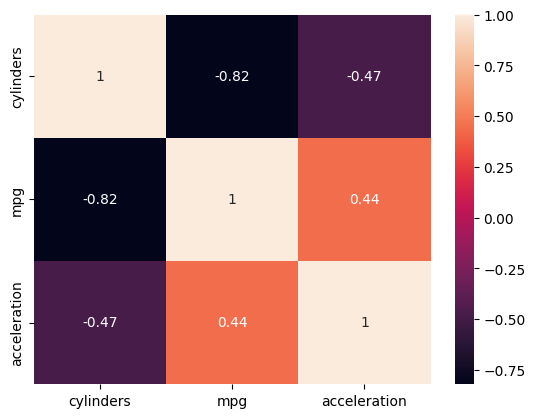

In [ ]:
g = sns.heatmap(data[['cylinders', 'mpg', 'acceleration']].corr(method='spearman'), 
            annot=True)